In [1]:
from vcat import ImageCube
import glob

2025-09-07 21:38:34,370 - INFO - vcat - Logging initialized. Log file: Console only.
2025-09-07 21:38:34,371 - INFO - vcat - No environment variable VCAT_CONFIG found, will use defaults.
2025-09-07 21:38:34,371 - INFO - vcat - Using DIFMAP path: /usr/local/difmap/uvf_difmap_2.5g/


Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


2025-09-07 21:38:34,461 - INFO - vcat - Importing images:
Processing: 100%|█████████████████████████████████| 5/5 [00:05<00:00,  1.07s/it]
2025-09-07 21:38:39,820 - INFO - vcat - Imported 5 images successfully.


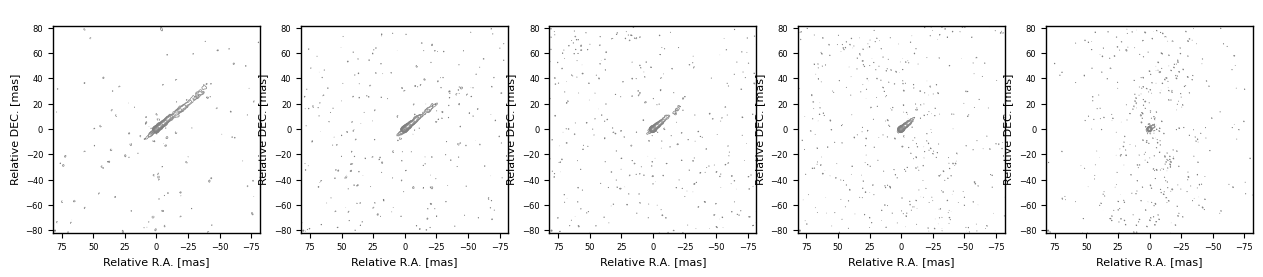

In [2]:
files=glob.glob("../dataset_example/NGC315_turnover/*.fits")

#import the data and plot it
im_cube=ImageCube().import_files(fits_files=files)
im_cube.plot()

2025-09-07 21:38:49,656 - WARNING - vcat - No .uvf file attached or useDIFMAP=False selected, will do simple shift of image only
2025-09-07 21:38:51,276 - WARNING - vcat - No .uvf file attached or useDIFMAP=False selected, will do simple shift of image only
2025-09-07 21:38:52,833 - WARNING - vcat - No .uvf file attached or useDIFMAP=False selected, will do simple shift of image only
2025-09-07 21:38:54,172 - WARNING - vcat - No .uvf file attached or useDIFMAP=False selected, will do simple shift of image only
2025-09-07 21:38:55,348 - WARNING - vcat - No .uvf file attached or useDIFMAP=False selected, will do simple shift of image only
/home/flep98/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/flep98/VCAT/vcat/helpers.py:1136: RuntimeWarning: invalid value encountered in multiply
  return i0 * (x / turn)**alphat * 

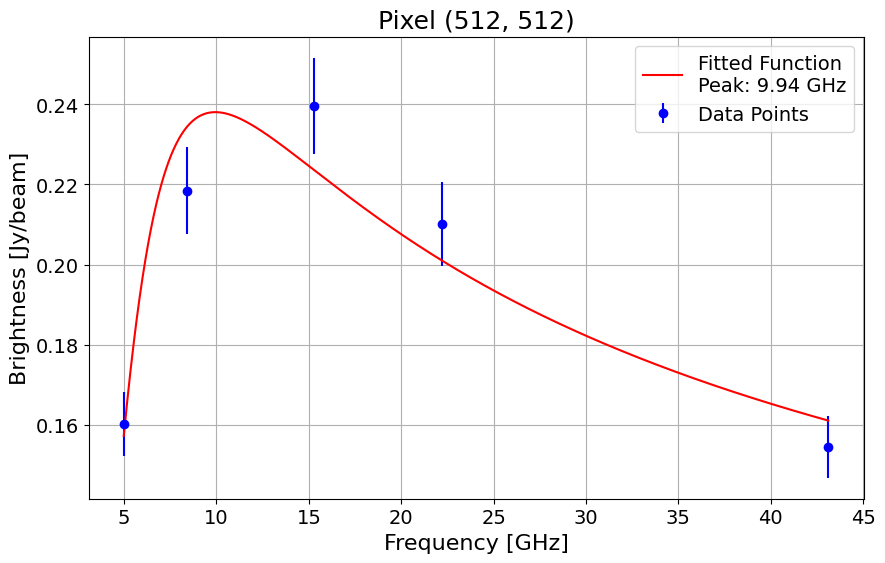

/home/flep98/VCAT/vcat/helpers.py:1136: RuntimeWarning: invalid value encountered in power
  return i0 * (x / turn)**alphat * (1.0 - np.exp(-(turn / x)**(alphat - alpha0)))
/home/flep98/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/flep98/VCAT/vcat/helpers.py:1136: RuntimeWarning: invalid value encountered in multiply
  return i0 * (x / turn)**alphat * (1.0 - np.exp(-(turn / x)**(alphat - alpha0)))
/home/flep98/VCAT/vcat/image_cube.py:1177: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


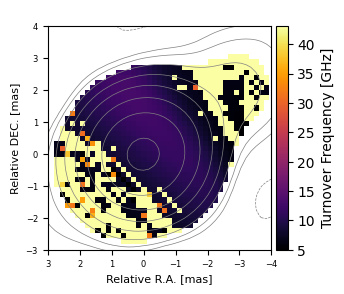

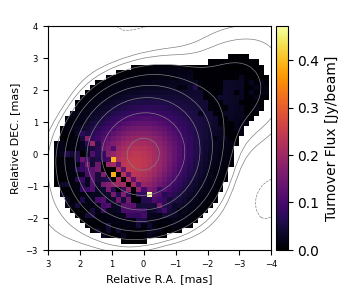

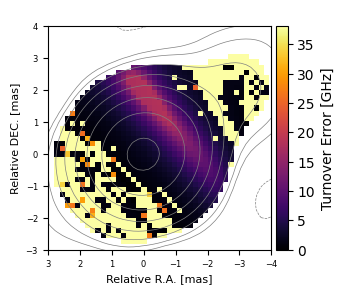

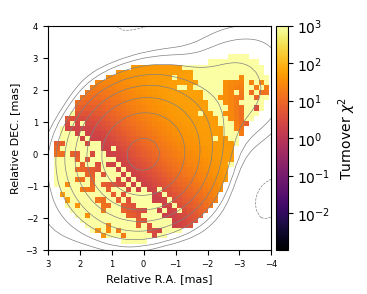

In [3]:
#We know the shifts for these data, so we will apply them manually
im_cube=im_cube.shift(mode="freq",shift_x=[0.64,0.48,0.32,0.16,0],shift_y=[-0.64,-0.48,-0.32,-0.16,0])

#now get the turnover frequency map
#the "specific_pixel" parameter will plot the turnover fit for the chosen pixel, if selected
turnover_map=im_cube.get_turnover_map(specific_pixel=(512,512),limit_freq=False)


turnover_map.plot(plot_mode="turnover",xlim=[3,-4],ylim=[-3,4],do_colorbar=True,contour=True,plot_beam=False)
turnover_map.plot(plot_mode="turnover_flux",xlim=[3,-4],ylim=[-3,4],do_colorbar=True,contour=True,plot_beam=False)
turnover_map.plot(plot_mode="turnover_error",xlim=[3,-4],ylim=[-3,4],do_colorbar=True,contour=True,plot_beam=False)
turnover_map.plot(plot_mode="turnover_chisquare",xlim=[3,-4],ylim=[-3,4],do_colorbar=True,contour=True,plot_beam=False)